In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1694,-122.26,38.00,6.0,678.0,104.0,318.0,91.0,5.2375,246400.0,NEAR BAY
3615,-118.44,34.26,34.0,1102.0,212.0,949.0,212.0,4.0792,165100.0,<1H OCEAN
6306,-117.89,33.99,22.0,3272.0,618.0,1784.0,591.0,4.0324,211300.0,<1H OCEAN
608,-122.08,37.68,37.0,848.0,202.0,314.0,205.0,2.3958,190800.0,NEAR BAY
18592,-122.07,37.13,26.0,1127.0,199.0,543.0,199.0,4.9792,240000.0,NEAR OCEAN


In [4]:
housing_data = housing_data.dropna()

In [5]:
housing_data.shape

(20433, 10)

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [8]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [9]:
housing_data.shape

(19475, 10)

In [10]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [13]:
housing_data.shape

(19475, 14)

In [14]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16814,-122.43,37.64,34.0,8400.0,1812.0,4101.0,1717.0,4.1033,301000.0,0,0,0,0,1
9683,-118.99,37.63,10.0,7744.0,1573.0,483.0,224.0,3.2917,231800.0,0,1,0,0,0
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0,1,0,0,0,0
1062,-121.86,39.75,18.0,1651.0,309.0,856.0,293.0,3.5046,118300.0,0,1,0,0,0
16301,-121.36,38.00,17.0,4535.0,762.0,1562.0,743.0,5.3224,225800.0,0,1,0,0,0


In [15]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [16]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [19]:
y_train.shape, y_test.shape

((15580,), (3895,))

### Train a linear model for price prediction

In [20]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=False).fit(x_train, y_train)

In [21]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.6104963062761299


In [22]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [23]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND       -2.095448e+06
ocean_proximity_NEAR BAY     -2.063034e+06
ocean_proximity_<1H OCEAN    -2.057219e+06
ocean_proximity_NEAR OCEAN   -2.053189e+06
ocean_proximity_ISLAND       -1.863011e+06
longitude                    -2.408297e+04
latitude                     -2.229788e+04
population                   -2.963508e+01
total_rooms                  -6.964942e+00
households                    3.509179e+01
total_bedrooms                9.699048e+01
housing_median_age            9.640257e+02
median_income                 3.856478e+04
dtype: float64


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
6116,200643.070858,138200.0
4301,141021.926057,262500.0
17764,183997.313324,182100.0
17534,189008.860934,188900.0
11787,132416.950406,173200.0
7192,103323.551049,143800.0
12066,219555.956994,339300.0
16183,70936.924774,75000.0
5936,206941.351290,156800.0
19539,107631.586533,95500.0


In [26]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6222626057241408


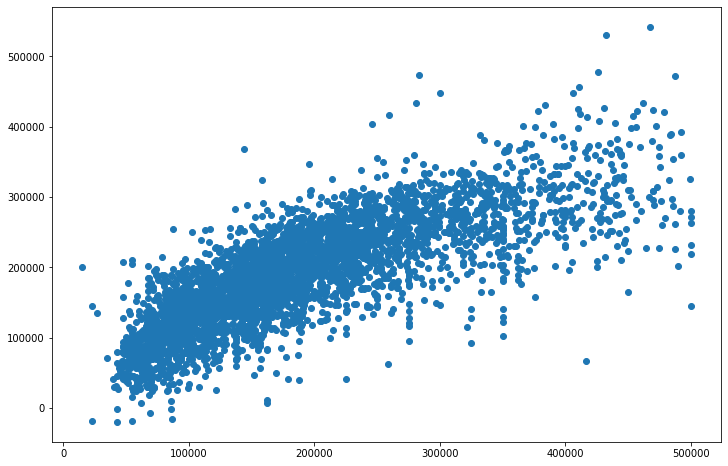

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [28]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [29]:
df_pred_actual_sample.head()

,index,predicted,actual
0,8623,267771.236564,456100.0
1,12712,92830.450682,156800.0
2,4166,152975.536794,166300.0
3,2417,44510.929335,56700.0
4,17034,243658.159107,341500.0


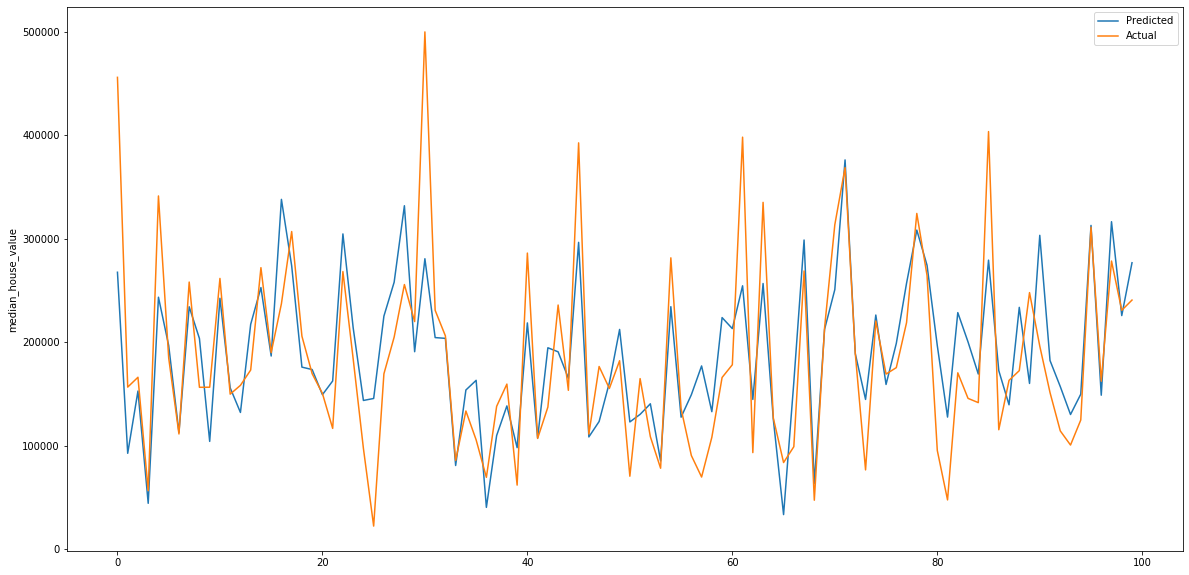

In [30]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()